In [2]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
# Load Baseline InceptionV3 sweep from wandb
api = wandb.Api()
entity, project = "arnalytics-universitat-aut-noma-de-barcelona", "C6-Week1"

run_id = "48k4keyj"

run = api.run(f"{entity}/{project}/{run_id}")
df = run.history()

In [23]:
df.columns

Index(['_step', '_runtime', 'train/loss', 'train/grad_norm',
       'train/learning_rate', 'train/epoch', '_timestamp', 'train/global_step',
       'loss', 'learning_rate', 'epoch', 'grad_norm', 'map_pedestrian',
       'mar_10', 'mar_medium', 'mar_100_pedestrian', 'map_small', 'map_75',
       'mar_100', 'map_50', 'map', 'map_car', 'mar_small', 'map_medium',
       'mar_100_car', 'mar_1', 'mar_large', 'map_large', 'eval/mar_10',
       'eval/map', 'eval/map_75', 'eval/mar_1', 'eval/mar_100_pedestrian',
       'eval/map_small', 'eval/mar_small', 'eval/loss', 'eval/mar_100_car',
       'eval/map_car', 'eval/map_50', 'eval/map_pedestrian',
       'eval/steps_per_second', 'eval/mar_medium', 'eval/samples_per_second',
       'eval/map_large', 'eval/mar_large', 'eval/runtime', 'eval/map_medium',
       'eval/mar_100', 'eval_map', 'eval_map_75', 'eval_map_medium',
       'eval_runtime', 'eval_map_small', 'eval_map_car',
       'eval_steps_per_second', 'eval_mar_small', 'eval_mar_100',
      

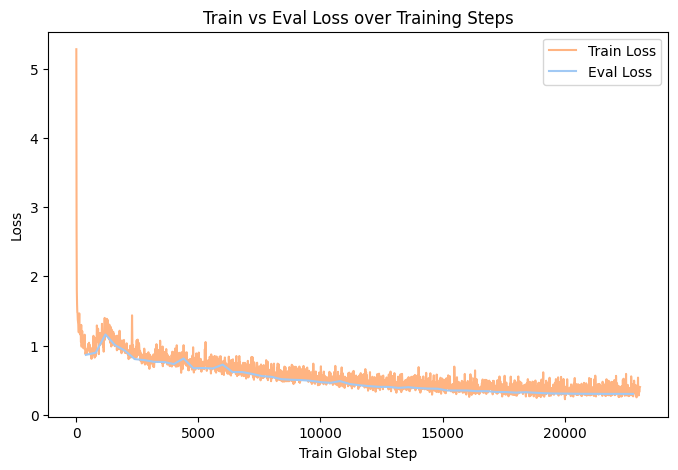

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define pastel colors
colors = sns.color_palette("pastel")

plt.figure(figsize=(8, 5))

# Plot Train Loss (Pastel Orange)
sns.lineplot(data=df, x='train/global_step', y='train/loss', color=colors[1], label='Train Loss')

# Plot Eval Loss (Pastel Blue)
sns.lineplot(data=df, x='train/global_step', y='eval_loss', color=colors[0], label='Eval Loss')

# Labels and title
plt.xlabel('Train Global Step')
plt.ylabel('Loss')
plt.title('Train vs Eval Loss over Training Steps')
plt.legend()

plt.show()


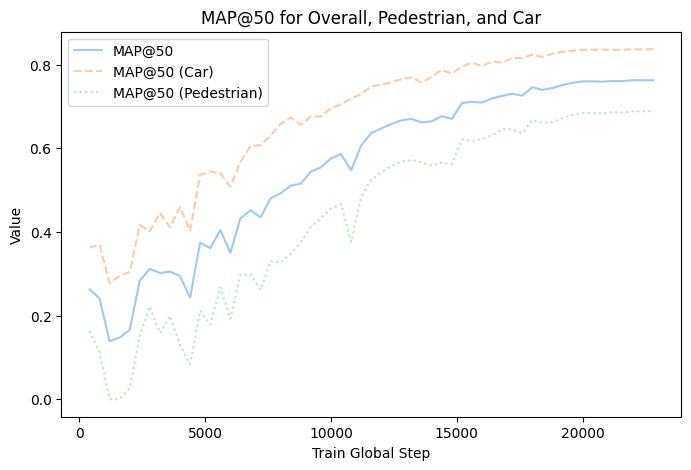

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define pastel colors
colors = sns.color_palette("pastel")

plt.figure(figsize=(8, 5))

# Plot MAP@50 (solid line)
sns.lineplot(data=df, x='train/global_step', y='map', color=colors[0], label='MAP@50')

# Plot MAP@50 (Car) - Dashed line, transparent
sns.lineplot(data=df, x='train/global_step', y='map_pedestrian', 
             color=colors[1], label='MAP@50 (Car)', linestyle='--', alpha=0.7)

# Plot MAP@50 (Pedestrian) - Dotted line, transparent
sns.lineplot(data=df, x='train/global_step', y='map_car', 
             color=colors[2], label='MAP@50 (Pedestrian)', linestyle=':', alpha=0.7)

# Labels and title
plt.xlabel('Train Global Step')
plt.ylabel('Value')
plt.title('MAP@50 for Overall, Pedestrian, and Car')
plt.legend()

plt.show()
